In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [4]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
df.shape

(122410, 97)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [7]:
df.round_winner.value_counts(normalize=True)

T     0.509811
CT    0.490189
Name: round_winner, dtype: float64

In [8]:
df.map.unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

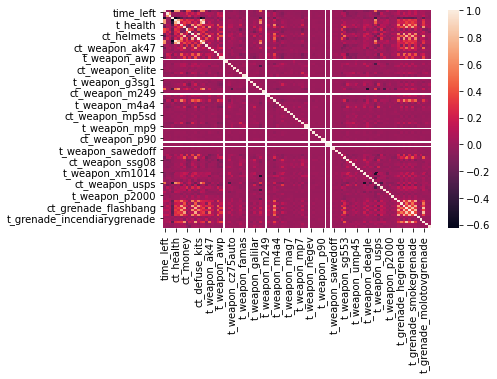

In [9]:
sns.heatmap(df.corr())
plt.show()

In [10]:
df['round_winner'] = df['round_winner'].map({'CT':0,"T":1})

In [11]:
df[['ct_money','t_money','round_winner','bomb_planted']].corr()

,ct_money,t_money,round_winner,bomb_planted
ct_money,1.000000,0.373822,-0.129326,-0.190107
t_money,0.373822,1.000000,0.098362,-0.125822
round_winner,-0.129326,0.098362,1.000000,0.187101
bomb_planted,-0.190107,-0.125822,0.187101,1.000000


In [12]:
problematic_indices = []
filt = []

for i in range(1,df.shape[0]):
    if df.loc[i,'ct_score'] != df.loc[i-1, 'ct_score'] \
and df.loc[i,'t_score'] != df.loc[i-1, 't_score'] \
    and df.loc[i-1,'ct_score'] != 15.0 \
    and df.loc[i-1,'t_score'] != 15.0:
        problematic_indices.append(i)
        filt.append(i-1)
        filt.append(i)

print(len(problematic_indices))

df.loc[filt]

678


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
79,74.96,10.0,4.0,de_dust2,False,109.0,200.0,200.0,200.0,20050.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
80,175.00,4.0,11.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
186,35.15,8.0,6.0,de_mirage,True,200.0,262.0,200.0,295.0,700.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
187,169.95,7.0,8.0,de_mirage,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
380,32.98,4.0,10.0,de_dust2,True,139.0,170.0,200.0,199.0,1250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121845,175.00,0.0,0.0,de_nuke,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
121938,19.80,11.0,3.0,de_nuke,True,100.0,184.0,100.0,196.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
121939,175.00,4.0,11.0,de_nuke,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122324,54.94,8.0,6.0,de_train,False,238.0,370.0,298.0,366.0,1600.0,...,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
df.shape

(122410, 97)

In [14]:
df.drop(filt, inplace= True)

In [15]:
df.shape

(121054, 97)

In [16]:
df.round_winner.value_counts(normalize= True)

1    0.51007
0    0.48993
Name: round_winner, dtype: float64

In [17]:
df.columns.values

array(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted',
       'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money',
       't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits',
       'ct_players_alive', 't_players_alive', 'ct_weapon_ak47',
       't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp',
       't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s',
       't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4',
       'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7',
       't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_

In [18]:
df.to_csv('cs_go.csv')

In [20]:
pd.read_csv('cs_go.csv').shape

(121054, 98)